In [1]:
goi =['CDR1', 'SNORA65', 'SNORA71E', 'CSNK2A3', 'FN1', 'OLFM4', 'SLC26A2', 'ST6GALNAC5', 'CXCR2P1', 'SCG2', 'MT1M', 'BBS10', 
'ROPN1L-AS1', 'CA1', 'REP15', 'EMP1', 'PLXNA4', 'SLC26A3', 'SNORA74A', 'C2orf88', 'TMCC3', 'ALDOB', 'HIGD1A', 'GUCA2B', 
'PRICKLE2-AS1', 'HHLA2', 'PKHD1L1', 'MIR5690', 'LINC01559', 'LINC01047', 'RCAN2', 'FAM50B', 'CMBL', 'TMEM30B', 'CA2', 
'RNY4', 'KRT17', 'HLA-DRB1', 'AKR1B1', 'IGLL5', 'ADAMTS6', 'IGSF10', 'PLGLB1', 'URAD', 'PRPF40B', 'NT5E', 'HCG4B', 
'CLDN2', 'INHBA', 'P4HA3', 'ATP6V1E2', 'FLG', 'SNORA7A', 'TCHH', 'CLDN8', 'CDKN2B', 'OLFML3', 'CCL2', 'INSM1', 'MIR8485', 
'ABCB1', 'RNF138P1', 'GSN', 'RAB40AL', 'PPP1R9A', 'MUC12', 'TUBB2B', 'FER1L6', 'OR2A9P', 'SSPN', 'SRI', 'ZHX1-C8orf76', 
'NDUFS1', 'MAGI2', 'P2RY1', 'CD36', 'ADH1B', 'MEP1A', 'RBIS', 'PI16', 'DHRS12', 'FABP2', 'SPARC', 'CALB2', 'CAPRIN2', 
'HAGLR', 'IMMP1L', 'PMP2', 'PDK4', 'GJA1', 'MMP1', 'PCDH20', 'MMP3', 'SNORA74D', 'SOX2', 'MGP', 'CCDC184', 'MT1H',
'TNPO3','ABCC9','CPA6', 'LINC01124']
normal = ['CRCnx055', 'CRCnx031', 'CRCnx037','CRCnx040','CRCnx047', 'CRCnx046', 'CRCnx025', 'CRCnx033','CRCnx028', 
       'CRCnx053','CRCnx050', 'CRCnx035', 'CRCnx029','CRCnx027', 'CRCnx039', 'CRCnx026','CRCnx024','CRCnx022', 'CRCnx030', 
          'CRCnx034','CRCnx036','CRCnx023', 'CRCnx054', 'CRCnx032' ,'CRCnx021']

In [2]:
len(goi)

102

In [3]:
cd /mnt/Sdrive/SCIENCE-BIO-BRSDriveCircularVision/Judith/Projects/CRC

/mnt/Sdrive/SCIENCE-BIO-BRSDriveCircularVision/Judith/Projects/CRC


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm 
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle

In [5]:
FC =pd.read_csv('RNA_Seq/Results/GenexpressionMatrix_50samp.tsv',sep='\t', index_col=0)

In [6]:
FC =FC[FC.index.isin(goi)]

In [7]:
FC =FC[FC.columns[~FC.columns.isin(normal)]]
#df2 = df1[df1.keys()[df1.keys().isin(my_list)]]
FC = FC.T

In [8]:
FC1 = np.log2(FC+1)

In [9]:
df2 = FC1.copy()

In [10]:
s = {}
df2 = df2[sorted(df2.columns)]
sample_ranks = {}
for sample in df2.index:
    v = df2.loc[sample]
    s[sample] = v.sum()
s= pd.Series(s)
Samp_order =s.sort_values(ascending = False)

In [11]:
g =df2.sum()
gene_ranks = g.sort_values(ascending = False)

In [12]:
df2 = df2.reindex(Samp_order.index)

In [13]:
df2

geneid,ABCB1,ABCC9,ADAMTS6,ADH1B,AKR1B1,ALDOB,ATP6V1E2,BBS10,C2orf88,CA1,...,SRI,SSPN,ST6GALNAC5,TCHH,TMCC3,TMEM30B,TNPO3,TUBB2B,URAD,ZHX1-C8orf76
CRCtx037,3.007779,1.431195,0.523773,1.474956,2.782308,3.952035,0.522263,0.776267,2.909775,5.214136,...,5.647438,1.500991,0.221453,0.091328,3.206299,3.658497,1.409307e+00,0.464349,3.396203,0.405262
CRCtx027,3.562434,0.357371,0.000000,2.913369,2.712272,0.362379,0.561906,0.678375,3.451396,7.176100,...,6.243752,1.785952,0.243661,0.048360,3.484900,3.764675,1.805150e+00,1.395683,4.075764,0.402510
CRCtx039,1.955149,0.644859,0.437362,1.554992,2.622790,3.660655,0.700437,0.980918,1.735726,3.511394,...,6.300455,0.870655,0.295032,0.000000,2.055949,3.114177,2.823525e+00,0.228070,0.784512,0.859773
CRCtx028,3.216198,2.395562,0.391128,0.531865,3.648914,2.042858,0.613081,0.853285,0.805432,0.143224,...,4.641124,1.295483,0.857361,0.043932,1.647263,2.354963,1.995604e+00,0.644181,0.000000,1.181713
CRCtx025,1.024461,0.142591,0.116360,0.386113,2.567465,2.085367,0.335074,0.771794,1.123570,2.988343,...,5.249013,0.857287,0.203701,0.009043,1.993493,2.994830,2.436847e+00,0.405194,2.453125,0.668080
CRCtx033,1.492851,0.640515,0.080227,0.422135,3.103967,3.264166,0.973484,0.787020,0.934065,0.634946,...,5.547414,0.866887,0.292174,0.059561,1.703734,3.075817,3.259321e+00,0.615039,0.098071,1.138507
CRCtx047,4.250994,0.808756,0.409975,0.190304,2.512725,0.960441,0.598618,0.742744,0.708347,0.315734,...,4.813840,0.572020,0.295935,0.131752,1.618247,2.026612,5.618581e-01,0.534171,0.000000,0.693854
CRCtx024,0.556178,1.553257,1.003991,0.327465,4.670410,0.920117,0.266835,0.868504,0.842267,0.782357,...,4.911674,0.671002,0.408846,0.049884,2.337506,2.324344,8.970328e-01,0.379684,0.000000,0.975180
CRCtx032,2.352467,0.022780,0.066350,0.436758,0.828365,2.084347,0.179220,0.220783,2.742024,6.365837,...,5.441850,0.751957,0.020974,0.000000,2.479898,3.004102,3.218265e-01,0.356251,1.169194,0.188443
CRCtx022,0.816564,0.399045,0.297726,0.260271,3.596005,4.458513,0.216964,0.655402,0.658181,0.206317,...,4.006384,0.696384,0.356794,0.018633,1.973912,3.300342,8.274128e-02,1.840068,0.000000,0.649583


In [14]:
df2 = df2.T
df2 = df2.reindex(gene_ranks.index)

In [15]:
TTcs = pd.read_csv('eccDNA/Filt_CRCTumourTissue_Fullgenes2_WithGeneSymbol_only.bed',sep='\t',header=None)

TTcs.columns =['Chromosome','Start','End','Length','Origin','Chrom','GeneStart','GeneEnd','GENE_ID','GeneName','GeneLength','Genetic_integrity','HGNC']

TTcs = TTcs[~TTcs['Origin'].isin(['CRCt-001_Cr', 'CRCt-002_Cr', 'CRCt-003_Cr', 'CRCt-004_Cr',
       'CRCt-005_Cr'])]

TTcs = TTcs[['Origin','HGNC']]

In [16]:
TTcs = TTcs[TTcs['HGNC'].isin(goi)]

In [17]:
tem = []
for i in TTcs.index:
    tem.append(':'.join((TTcs.loc[i,'Origin'], TTcs.loc[i,'HGNC'])))

In [18]:
FC = FC.T

In [19]:
PA = {}
for i in tqdm(FC.index):
    PA[i] = []
    for j in FC.columns:
        sg = (':'.join((j.replace('x','-'),i)))
        if sg in tem:
            PA[i].extend([j])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 6932.32it/s]


In [20]:
TT = np.zeros((len(FC.index), len(FC.columns)))
TT = pd.DataFrame(TT)
TT.index = FC.index
TT.columns = FC.columns

In [21]:
for i in FC.index:
    for j in PA[i]:
        TT.loc[i,j] = 1

In [22]:
TT= TT.T
df2 = df2.T

In [23]:
df2

geneid,IGLL5,SPARC,FN1,GSN,OLFM4,MUC12,SRI,MMP1,CA2,SLC26A3,...,ADAMTS6,MAGI2,PLGLB1,CCDC184,PI16,IGSF10,FLG,PKHD1L1,PMP2,TCHH
CRCtx037,7.818020,6.455627,6.209413,7.057701,5.061992,7.116947,5.647438,1.524130,6.908389,8.548595,...,0.523773,0.369676,0.122922,0.445749,0.052660,0.000000,0.064089,0.096280,0.031536,0.091328
CRCtx027,8.883792,4.708276,5.378831,7.380804,1.002983,8.353861,6.243752,1.275009,8.047901,8.532305,...,0.000000,0.480907,0.297264,0.186835,0.889915,0.321121,0.127064,0.256664,0.107094,0.048360
CRCtx039,7.744819,5.438615,7.237616,6.706959,8.253885,7.956812,6.300455,2.019784,4.647583,6.549423,...,0.437362,0.340734,0.210782,0.219813,0.266146,0.000234,0.031600,0.038081,0.000000,0.000000
CRCtx028,9.626233,7.738351,6.472242,5.947583,7.687810,5.885816,4.641124,6.164129,3.926047,2.461256,...,0.391128,0.321493,0.444565,0.615017,0.726394,0.104942,0.177436,0.066563,0.068513,0.043932
CRCtx025,9.426910,7.118931,7.269082,6.186330,5.466027,8.129000,5.249013,4.727218,4.510114,6.144830,...,0.116360,0.251400,0.190751,0.139597,0.000000,0.007358,0.038710,0.034335,0.000000,0.009043
CRCtx033,7.135531,6.307979,5.306648,5.125627,9.777002,5.303204,5.547414,6.232519,3.003624,3.527371,...,0.080227,0.237122,0.000000,0.112442,0.000000,0.000000,0.019624,0.033697,0.000000,0.059561
CRCtx047,3.654061,6.673597,8.467394,4.560858,8.668084,7.530890,4.813840,4.221622,2.325763,5.561659,...,0.409975,0.239935,0.794702,0.389589,0.000000,0.000178,0.072671,0.059993,0.000000,0.131752
CRCtx024,3.673916,7.003618,7.792663,5.689993,4.481796,2.173217,4.911674,6.028717,2.980923,0.082936,...,1.003991,0.066730,0.291123,0.155815,0.000000,0.567922,0.136573,0.040954,0.076222,0.049884
CRCtx032,4.555363,3.224681,1.931111,7.249212,5.085973,8.633504,5.441850,0.347083,6.852724,7.153420,...,0.066350,0.077530,0.109357,0.050467,0.000000,0.014930,0.012727,0.024705,0.017492,0.000000
CRCtx022,10.176651,7.439594,8.250803,5.803164,0.000000,0.121454,4.006384,7.966436,3.712850,0.046519,...,0.297726,0.243248,0.000000,0.372568,0.142497,0.108449,0.030087,0.084114,0.042813,0.018633


In [24]:
TT

geneid,ABCB1,ABCC9,ADAMTS6,ADH1B,AKR1B1,ALDOB,ATP6V1E2,BBS10,C2orf88,CA1,...,SRI,SSPN,ST6GALNAC5,TCHH,TMCC3,TMEM30B,TNPO3,TUBB2B,URAD,ZHX1-C8orf76
CRCtx031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CRCtx022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CRCtx024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CRCtx037,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
CRCtx055,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CRCtx032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CRCtx028,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
CRCtx047,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
CRCtx027,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CRCtx046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
s = {}
dfx = TT[sorted(TT.columns)]
for sample in dfx.index:
    v = dfx.loc[sample]
    s[sample] = v.sum()
s= pd.Series(s)
Samp_order1 =s.sort_values(ascending = False)

In [26]:
dfx =dfx.reindex(Samp_order1.index)

In [27]:
g =dfx.sum()
gene_ranks1 = g.sort_values(ascending = False)
dfx = dfx.T
dfx = dfx.reindex(gene_ranks1.index)

In [28]:
dfx

,CRCtx030,CRCtx036,CRCtx035,CRCtx021,CRCtx033,CRCtx028,CRCtx047,CRCtx037,CRCtx027,CRCtx054,...,CRCtx025,CRCtx034,CRCtx055,CRCtx053,CRCtx040,CRCtx046,CRCtx024,CRCtx050,CRCtx026,CRCtx031
geneid,,,,,,,,,,,,,,,,,,,,,
PCDH20,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA2,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RAB40AL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
REP15,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA1,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HIGD1A,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SLC26A3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CLDN2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df =df2.reindex(dfx.columns)

In [30]:
df = df.T
df =df.reindex(dfx.index)

In [31]:
df = df.T
dfx = dfx.T

In [32]:
counts = pd.Series(dfx.sum())
counts

geneid
PCDH20     10.0
CA2         8.0
RAB40AL     8.0
REP15       8.0
CA1         7.0
           ... 
HIGD1A      2.0
SLC26A3     2.0
CLDN2       2.0
RCAN2       2.0
MAGI2       2.0
Length: 84, dtype: float64

In [56]:
counts

geneid,PCDH20,CA2,RAB40AL,REP15,CA1,FER1L6,IGLL5,PLXNA4,CSNK2A3,FAM50B,...,MEP1A,FLG,PRPF40B,GSN,HHLA2,HIGD1A,SLC26A3,CLDN2,RCAN2,MAGI2
CRCtx030,0.000000,1.634698,0.100920,0.326544,0.154851,0.289275,4.998460,0.087731,0.226809,0.225193,...,0.953372,0.028146,1.425219,5.357900,2.729424,3.478265,0.185979,4.749583,0.447843,0.114689
CRCtx036,1.345777,5.207977,0.000000,3.080271,0.806056,2.435285,7.085646,0.098963,0.000011,1.200504,...,4.194639,0.020849,1.085601,6.938413,3.132000,4.083573,5.144772,3.237661,0.699872,0.160698
CRCtx035,0.009312,0.279671,0.480918,0.241095,0.073372,0.064555,4.983414,0.133178,0.127047,0.057198,...,0.046694,0.059513,0.726100,2.448620,0.258174,0.729661,0.977333,0.405249,0.077436,0.057620
CRCtx021,0.248098,0.518235,0.157168,0.139263,0.200629,0.000000,2.103860,0.017082,0.763667,0.000000,...,1.337340,0.040374,1.081469,2.640248,1.501183,1.495846,2.010261,1.687772,0.375564,0.021623
CRCtx033,2.366247,3.003624,0.000000,1.352171,0.634946,0.801635,7.135531,0.152841,1.482590,1.745409,...,3.973887,0.019624,0.765274,5.125627,3.161318,4.273676,3.527371,4.099645,0.785693,0.237122
CRCtx028,0.242190,3.926047,0.287719,0.651825,0.143224,0.290975,9.626233,0.717935,0.596762,1.715779,...,3.387878,0.177436,0.134403,5.947583,1.859473,3.557899,2.461256,1.577184,2.136546,0.321493
CRCtx047,0.145512,2.325763,0.906318,0.812901,0.315734,0.736401,3.654061,0.640867,1.045191,1.002148,...,3.681865,0.072671,1.266363,4.560858,2.361309,3.055138,5.561659,5.670180,0.635489,0.239935
CRCtx037,1.760532,6.908389,0.534695,2.556368,5.214136,2.570453,7.818020,0.470402,1.138742,1.145404,...,5.685514,0.064089,0.731811,7.057701,4.353785,4.306606,8.548595,1.437027,1.852514,0.369676
CRCtx027,1.068547,8.047901,0.425924,3.149090,7.176100,3.414738,8.883792,0.480561,0.541403,0.937338,...,5.216800,0.127064,0.000000,7.380804,4.919553,5.254118,8.532305,0.059694,2.687222,0.480907
CRCtx054,0.877330,0.591397,0.762741,0.411004,0.343855,0.161346,6.845255,0.450949,1.210146,1.359291,...,2.497158,0.144065,1.245199,4.023607,2.078782,2.288719,2.997361,2.116648,0.573839,0.224394


In [59]:
TT =TT.reindex(df.index)

In [60]:
circle_count = TT.T.sum()

In [65]:
circle_count=circle_count.sort_values()

/home/judith/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/judith/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/judith/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/judith/anaconda3/lib/python3.11/site-packa

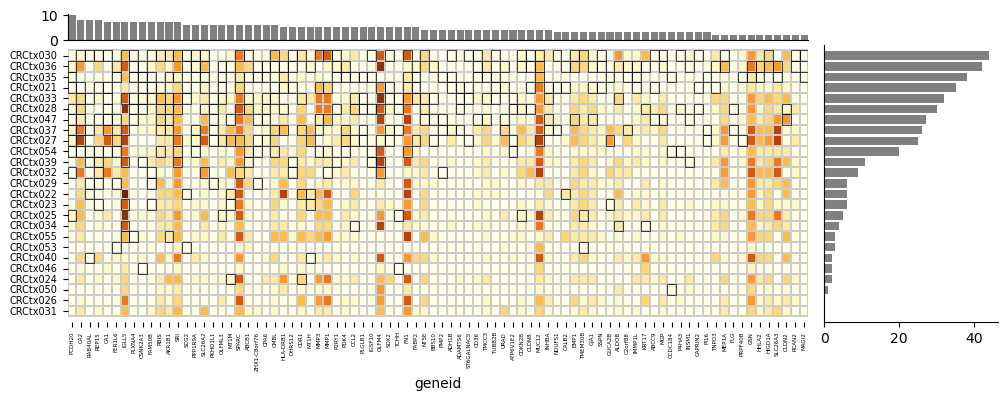

In [83]:
c = ['white', 'white']

fig = plt.figure(figsize=(12,4))
gs = GridSpec(10, 10, figure=fig)
ax = fig.add_subplot(gs[:1, :8])

 # Create an inset_axes for the bar chart
inds = list(range(counts.shape[0]))
sns.barplot(x=counts.index, y=counts.values, color='gray', ax=ax)
ax.legend(frameon=False, fontsize=7)
ax.set_xlim((0-0.5, inds[-1]+0.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([])



ax = fig.add_subplot(gs[1:, 8:])
inds = list(range(circle_count.shape[0]))
sns.barplot(x=circle_count.values, y=circle_count.index, color='gray', ax=ax)
ax.set_ylim((0-1, inds[-1]+1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([])

ax = fig.add_subplot(gs[1:, :8])
g = sns.heatmap(df.astype(int),cmap = 'YlOrBr',cbar_kws={'label': 'Expression(log2(TPM+1))',},
                ax=ax, yticklabels=df.index, linewidth=0.01, linecolor=('#cccccc'),
                xticklabels=df.columns, cbar=False, square=False)
for i, c in enumerate(dfx.columns):
    for j, v in enumerate(dfx[c]):
        if v == 1:
            ax.add_patch(Rectangle((i, j), 1, 1, fill=False, edgecolor='Black', lw=0.5))

g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 4)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 7)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


plt.savefig('RNA_Seq/Figures/Recurrentgenes_Expression_violinplotdata_doubleds_withbarplots1.pdf', dpi = 400, bbox_inches = 'tight')
plt.show()